<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Check-in" data-toc-modified-id="Final-Project-Check-in-1">Final Project Check-in</a></span></li><li><span><a href="#Group-Name" data-toc-modified-id="Group-Name-2">Group Name</a></span></li><li><span><a href="#Student-Names" data-toc-modified-id="Student-Names-3">Student Names</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-4">Load Data</a></span></li><li><span><a href="#Fit-scikit-learn-model" data-toc-modified-id="Fit-scikit-learn-model-5">Fit scikit-learn model</a></span></li><li><span><a href="#Evaluation-Metric" data-toc-modified-id="Evaluation-Metric-6">Evaluation Metric</a></span></li></ul></div>

Final Project Check-in
------

Group Name
-----

 Random_Forest_Elves


Student Names
----

1. Shirley Li
2. Jingxian Li 
3. Michael Schulze
4. Mundy Reimer

Load Data
-----

In [1]:
reset -fs

In [ ]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator

import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('fixed_cocaine_listings.csv')

In [4]:
df.head()

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,2841,5KG Bolivian Cocaine 92%,"EU → EU, WW",5000.0,92.0,51.50,0.010300,0.011196,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1,4607,✯3kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",3000.0,92.0,43.20,0.014400,0.015652,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
2,3407,COCAINE - 2 KILOGRAM - COLOMBIAN - 89% PURE,"DE → WW, AU",2000.0,89.0,38.60,0.019300,0.021685,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
3,2026,2KG Colombian Cocaine 90%,"EU → EU, WW",2000.0,90.0,30.40,0.015200,0.016889,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
4,4606,✯2kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",2000.0,92.0,29.89,0.014945,0.016245,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


### EDA & Visualization

AttributeError: 'DataFrame' object has no attribute 'show'

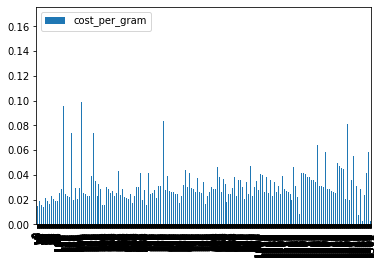

In [91]:
df.plot.bar(
           y="cost_per_gram")
df.show()

In [35]:
# Grabbing y's
y = df.btc_price
# Dropping the y column from original dataframe
df_b = df.drop("btc_price", axis=1)
df_b = df_b.drop(["cost_per_gram_pure", "Unnamed: 0", "product_title", "ships_from_to", "cost_per_gram",
                    "product_link", "vendor_link", "vendor_name", "ships_from", "ships_to", 
                    "ships_to_GR", "ships_from_GR", "ships_to_PL", "ships_from_PL", "ships_to_CO", 
                    "ships_from_CO", "ships_to_SE", "ships_from_SE", "ships_to_S. America", 
                    "ships_from_S. America", "ships_from_DK", "ships_to_DK", "ships_to_CN", "ships_to_CZ", 
                    "ships_to_BR", "ships_to_IT", "ships_from_SI", "ships_to_BE", "ships_from_N. America", 
                    "ships_to_ES", "ships_to_CH", "ships_from_CH", "ships_from_CZ", "ships_from_CN", 
                    "ships_to_WW", "ships_to_DE"
####
#                  "ships_to_US", "ships_from_US", "ships_to_NL", "ships_from_NL", "ships_to_FR", "ships_from_FR", 
#                  "ships_to_GB", "ships_from_GB", "ships_to_CA", "ships_from_CA", "ships_from_DE", 
#                  "ships_to_AU", "ships_from_AU", "ships_to_EU", "ships_from_EU", "ships_from_ES", 
#                  "ships_to_N. America", "ships_from_BE",
#                  "ships_from_WW", "ships_to_SI", "ships_from_IT", 
#                  "ships_from_BR"
                 ], axis=1)
df_b = df_b * 1
df_b["grams"] = np.log(df_b["grams"])
y = np.log(y)
df_b.head()

,grams,quality,escrow,successful_transactions,rating,ships_to_US,ships_from_US,ships_to_NL,ships_from_NL,ships_to_FR,...,ships_from_AU,ships_to_EU,ships_from_EU,ships_from_ES,ships_to_N. America,ships_from_BE,ships_from_WW,ships_to_SI,ships_from_IT,ships_from_BR
0,8.517193,92.0,0,100,4.96,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,8.006368,92.0,0,360,4.86,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7.600902,89.0,1,70,5.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.600902,90.0,0,100,4.96,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,7.600902,92.0,0,360,4.86,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#### 0.2210
#### 0.9203
#### 0.2151
#### 0.9464

df_b.loc[df.product_title.str.replace("\s", "")\
                            .str.contains('[iI][nN][tT][rR][oO]|[pP][rR][oO][mM][oO]|[sS][aA][mM][pP][lL][eE]'), "intro"] = 1
df_b.loc[~df.product_title.str.replace("\s", "")\
                            .str.contains('[iI][nN][tT][rR][oO]|[pP][rR][oO][mM][oO]|[sS][aA][mM][pP][lL][eE]'), "intro"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[cC][oO][lL][oO][mM][bB][iI][aA]'), "colombia"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[cC][oO][lL][oO][mM][bB][iI][aA]'), "colombia"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[pP][eE][rR][uU]'), "peru"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[pP][eE][rR][uU]'), "peru"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[bB][oO][lL][iI][vV][iI][aA]'), "bolivia"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[bB][oO][lL][iI][vV][iI][aA]'), "bolivia"] = 0


df_b["caps"] = df.product_title.str.findall(r'[A-Z]').str.len()/df.product_title.str.len()


df_b.loc[df.product_title.str.replace("\s", "")\
                            .str.contains('[fF][rR][eE][eE][sS][hH][iI][pP]'), "free_ship"] = 1
df_b.loc[~df.product_title.str.replace("\s", "")\
                             .str.contains('[fF][rR][eE][eE][sS][hH][iI][pP]'), "free_ship"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[uU][nN][cC][uU][tT]'), "uncut"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[uU][nN][cC][uU][tT]'), "uncut"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[fF][iI][sS][hH]'), "fish_cut"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[fF][iI][sS][hH]'), "fish_cut"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[bB][rR][iI][cC][kK]'), "brick"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[bB][rR][iI][cC][kK]'), "brick"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[cC][rR][aA][cC][kK]'), "crack"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[cC][rR][aA][cC][kK]'), "crack"] = 0

df_b.loc[df.product_title.str.replace("\s", "").str.contains('[cC][rR][yY][sS][tT][aA][lL]'), "crystal"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[cC][rR][yY][sS][tT][aA][lL]'), "crystal"] = 0

df_b.loc[df.product_title.str.replace("\s", "").str.contains('[fF][lL][aA][kK][eE]'), "flake"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[fF][lL][aA][kK][eE]'), "flake"] = 0

df_b.loc[df.product_title.str.replace("\s", "").str.contains('[pP][uU][rR][eE]'), "pure"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[pP][uU][rR][eE]'), "pure"] = 0


#### 0.1176
#### 0.9426
#### 0.1303
#### 0.8230
df_b.head()

,grams,quality,escrow,successful_transactions,rating,ships_to_US,ships_from_US,ships_to_NL,ships_from_NL,ships_to_FR,...,bolivia,caps,free_ship,uncut,fish_cut,brick,crack,crystal,flake,pure
0,8.517193,92.0,0,100,4.96,0,0,0,0,0,...,1.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.006368,92.0,0,360,4.86,1,0,0,1,0,...,0.0,0.535714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.600902,89.0,1,70,5.00,0,0,0,0,0,...,0.0,0.651163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7.600902,90.0,0,100,4.96,0,0,0,0,0,...,0.0,0.160000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.600902,92.0,0,360,4.86,1,0,0,1,0,...,0.0,0.535714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
# for x in list(df_b.columns):
#     print(x, df_b[x].sum())

In [8]:
# Split data
# X_train, X_test, y_train, y_test = train_test_split(df_b, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_b, y, test_size=0.2)

Fit scikit-learn model
----

In [9]:
# pipe_lr = Pipeline([('scl', StandardScaler()),          # Transformer: Standardize
#                     ('pca', PCA(n_components=2)),       # Transformer: Dimension Reduction
#                   classmethod('clf', LogisticRegression(solver='lbfgs', # Estimator: ML algorithm
#                                                multi_class='multinomial'))]) 

# Fit simple LR
lm = LinearRegression() # TODO: Replace with your choice of algorithm and hyperparameters 
lm.fit(X_train, y_train) # Train model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Evaluation Metric
----

In [10]:
medae_value = metrics.median_absolute_error(y_train, lm.predict(X_train))
print(f"{medae_value:.4f} medae on training set")

0.1112 medae on training set


In [11]:
lm.score(X_train, y_train)

0.9498321227229594

In [12]:
medae_value = metrics.median_absolute_error(y_test, lm.predict(X_test))
print(f"{medae_value:.4f} medae on test set")

0.1094 medae on test set


In [13]:
lm.score(X_test, y_test)

0.8733053774330646

In [14]:
for x,y in zip(list(df_b.columns), lm.coef_):
    if abs(y) < 0.05:
        print(x,y)

quality 0.00862897755622241
escrow 0.013520485595920659
successful_transactions 2.3121981494485462e-05
rating -0.03901416675834376
ships_to_EU -0.013884245571314617
colombia 0.011389919371865237
peru 0.020166066454777868
bolivia -0.022685868089831824
uncut 0.024681337984970773
crystal -0.01007813979099973
pure -0.018814602588309515


In [15]:
for x,y in zip(list(df_b.columns), lm.coef_):
    if abs(y) >= 0.5:
        print(x,y)

grams 0.915798121297822
ships_from_US 0.5679471356833024
ships_from_FR 0.5981371017976259
ships_from_GB 0.6777078750901914
ships_from_AU 1.2915653511952205
ships_from_ES 0.5481595763966175
ships_from_IT 0.5511441856398329


In [16]:
count = 0
for x,y,z in zip(y_train, lm.predict(X_train), X_train.iterrows()):
    if abs(x - y) > 5:
        print(z)
        print(df.iloc[z[0]][1])
        print(x, y)
        count += 1
print()
print(count)

(1502, grams                      -0.693147
quality                    90.000000
escrow                      1.000000
successful_transactions    20.000000
rating                      5.000000
ships_to_US                 0.000000
ships_from_US               0.000000
ships_to_NL                 0.000000
ships_from_NL               0.000000
ships_to_FR                 0.000000
ships_from_FR               0.000000
ships_to_GB                 1.000000
ships_from_GB               0.000000
ships_to_CA                 0.000000
ships_from_CA               0.000000
ships_from_DE               1.000000
ships_to_AU                 0.000000
ships_from_AU               0.000000
ships_to_EU                 1.000000
ships_from_EU               0.000000
ships_from_ES               0.000000
ships_to_N. America         0.000000
ships_from_BE               0.000000
ships_from_WW               0.000000
ships_to_SI                 0.000000
ships_from_IT               0.000000
ships_from_BR               0.0

In [17]:
count = 0
for x,y,z in zip(y_train, lm.predict(X_test), X_test.iterrows()):
    if abs(x - y) > 5:
        print(z)
        print(df.iloc[z[0]][1])
        print(x, y)
        count += 1
print()
print(count)

(1204, grams                         0.00000
quality                      90.00000
escrow                        1.00000
successful_transactions    1550.00000
rating                        4.84000
ships_to_US                   0.00000
ships_from_US                 0.00000
ships_to_NL                   0.00000
ships_from_NL                 0.00000
ships_to_FR                   0.00000
ships_from_FR                 0.00000
ships_to_GB                   1.00000
ships_from_GB                 1.00000
ships_to_CA                   0.00000
ships_from_CA                 0.00000
ships_from_DE                 0.00000
ships_to_AU                   0.00000
ships_from_AU                 0.00000
ships_to_EU                   0.00000
ships_from_EU                 0.00000
ships_from_ES                 0.00000
ships_to_N. America           0.00000
ships_from_BE                 0.00000
ships_from_WW                 0.00000
ships_to_SI                   0.00000
ships_from_IT                 0.00000
ships

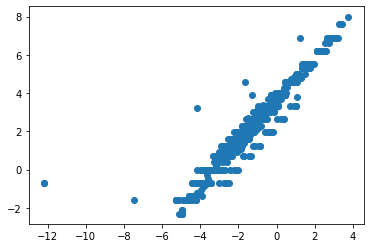

In [18]:
plt.scatter(y_train, X_train["grams"])
plt.show()

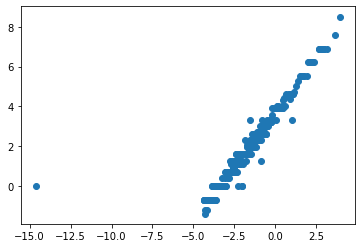

In [19]:
plt.scatter(y_test, X_test["grams"])

---

### Fitting a Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
# Fit simple LR
rf = RandomForestRegressor(criterion='mae') # TODO: Replace with your choice of algorithm and hyperparameters 
rf.fit(X_train, y_train) # Train model

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [82]:
medae_value = metrics.median_absolute_error(y_train, rf.predict(X_train))
print(f"{medae_value:.4f} medae on training set")

0.0447 medae on training set


In [83]:
rf.score(X_train, y_train)

0.9939899585484802

In [84]:
medae_value = metrics.median_absolute_error(y_test, rf.predict(X_test))
print(f"{medae_value:.4f} medae on test set")

0.1242 medae on test set


In [85]:
rf.score(X_test, y_test) 

0.872194973519816